### 更新数据

In [1]:
import akshare as ak

df = ak.stock_zh_index_daily(symbol="sh000001")
df.to_csv("data/sh000001.csv", index=False, encoding="utf-8-sig")

df = ak.stock_market_pe_lg(symbol="上证")
df.to_csv("data/shanghaiPE.csv", index=False, encoding="utf-8-sig")

### RSI 分位图

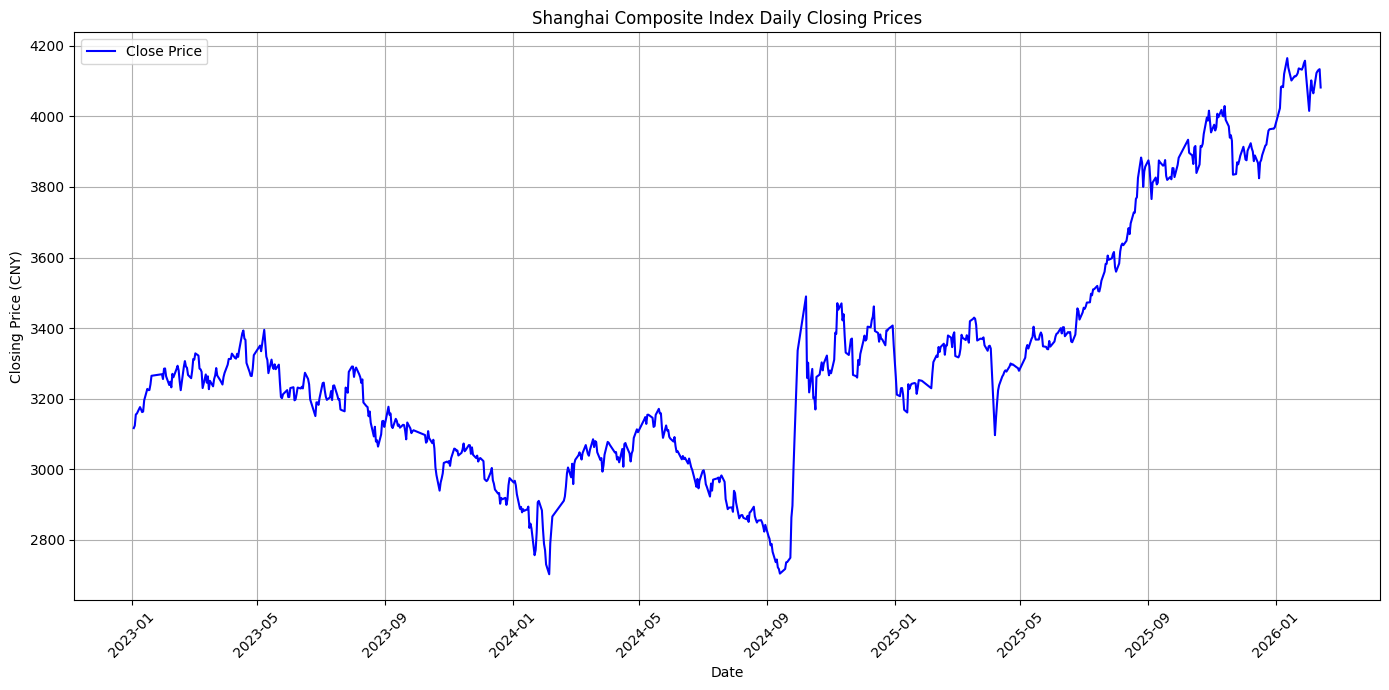

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/sh000001.csv", parse_dates=["date"])
data["date"] = pd.to_datetime(data["date"])
data = data[data['date'] >= pd.to_datetime("2023-01-01")]

plt.figure(figsize=(14, 7))
plt.plot(data["date"], data["close"], label="Close Price", color='blue')
plt.title("Shanghai Composite Index Daily Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price (CNY)")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("output/shanghai_index_plot.png")
plt.show()

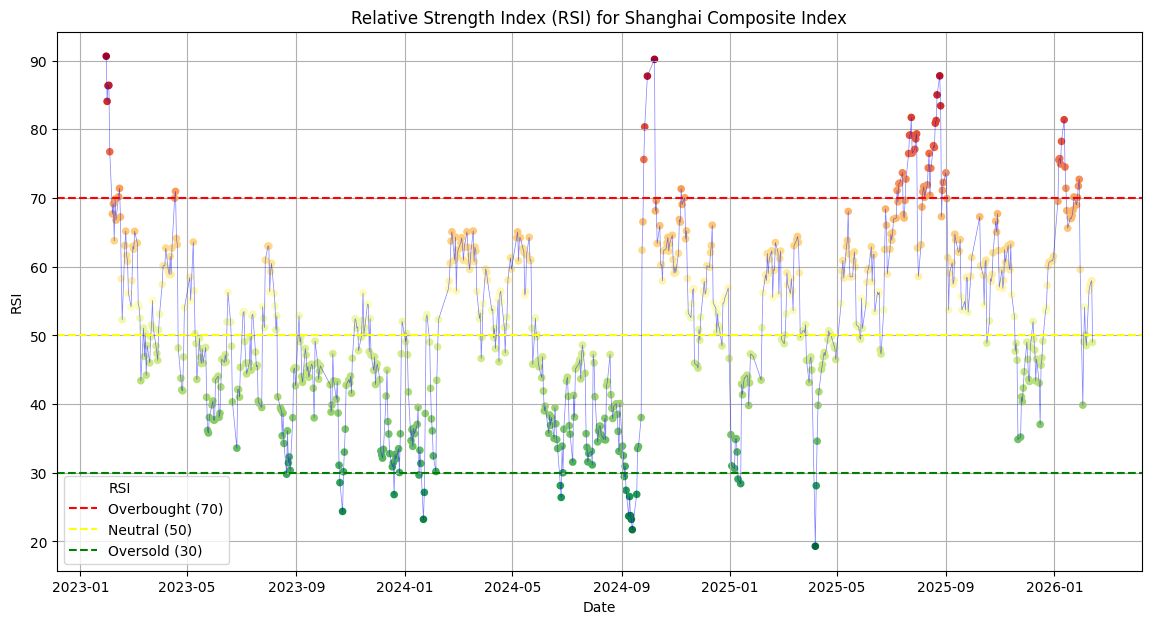

In [3]:
from src.calculate_rsi import calculate_rsi

data['rsi'] = calculate_rsi(data['close'].tolist(), window=14)

# 绘制RSI图表
plt.figure(figsize=(14, 7))
scatter = plt.scatter(data["date"], data["rsi"], c=data["rsi"], cmap='RdYlGn_r', s=20, label="RSI")
plt.plot(data["date"], data["rsi"], color='blue', alpha=0.5, linewidth=0.5)
# plt.colorbar(scatter, label='RSI Value')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(50, color='yellow', linestyle='--', label='Neutral (50)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for Shanghai Composite Index')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.savefig("output/rsi_sh000001.png")
plt.show()

### 市盈率 PE

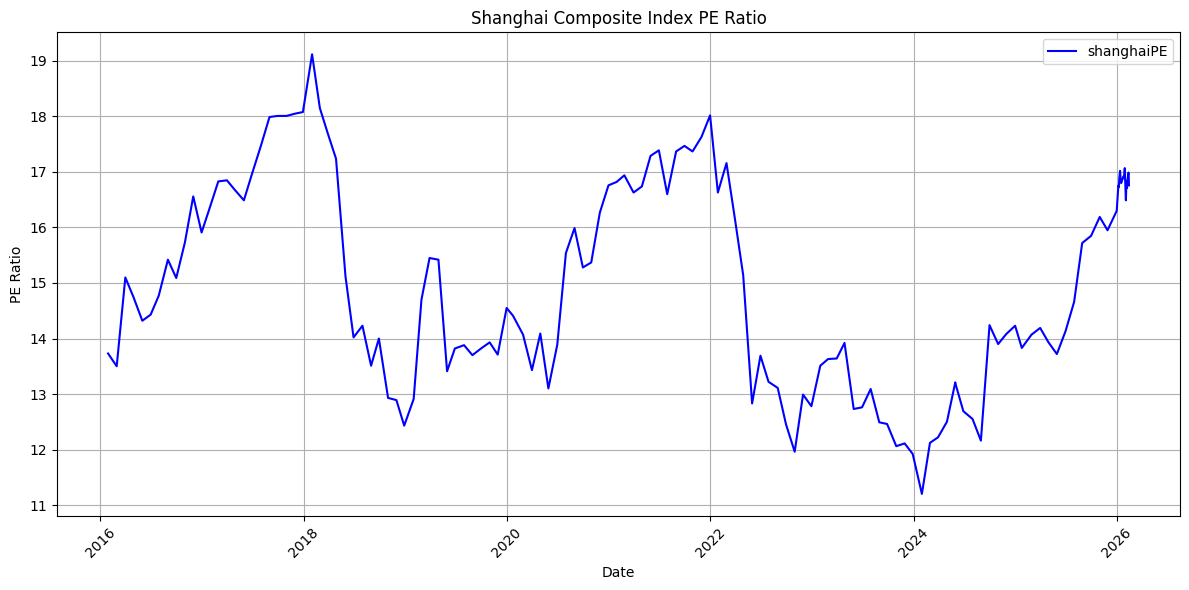

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/shanghaiPE.csv")
data['日期'] = pd.to_datetime(data['日期'])
data = data[data['日期'] >= '2016-01-01']

plt.figure(figsize=(12, 6))
plt.plot(data['日期'], data['平均市盈率'], label='shanghaiPE', color='blue')
plt.title('Shanghai Composite Index PE Ratio')
plt.xlabel('Date')
plt.ylabel('PE Ratio')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("output/shanghaiPE.png", dpi=300)
plt.show()